##TRABAJO PRÁCTICO N°2
Integrantes: \
-Enzo Ferrari \
-Abril Rodriguez \
-Micaela Pozzo

#Ejercicio 2


##Preparación del entorno.


In [1]:
import os

# Nombre del repositorio y URL para clonar
REPO_NAME = "AA2_tp2"
REPO_URL = "https://github.com/abrilr1604/AA2_tp2.git"

# Verificar si ya estamos en el directorio del repositorio
if REPO_NAME not in os.getcwd():
    # Verificar si el repositorio ya existe localmente
    if not os.path.exists(REPO_NAME):
        try:
            # Intentar clonar el repositorio
            !git clone {REPO_URL}
        except Exception as e:
            print(f"No se pudo clonar el repositorio: {e}")

    # Cambiar al directorio del repositorio si se clonó correctamente
    if os.path.exists(REPO_NAME):
        os.chdir(REPO_NAME)
        print(f"Cambiado al directorio del repositorio {REPO_NAME}")
    else:
        print(f"No se encontró el directorio del repositorio {REPO_NAME}")
else:
    print(f"Ya estás en el directorio del repositorio {REPO_NAME}")


Cloning into 'AA2_tp2'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 46 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (46/46), 2.20 MiB | 7.21 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Cambiado al directorio del repositorio AA2_tp2


In [2]:
!pip install --upgrade tensorflow tensorflow-gpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 1.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import os
print(os.getcwd())


/content/AA2_tp2


Establecer GPU por defecto.

In [4]:
import tensorflow as tf
import numpy as np
import os
import time

In [5]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


Lectura y análisis de datos

In [6]:
import tensorflow_datasets as tfds

# Cargar el conjunto de datos
ds, info = tfds.load('ag_news_subset', with_info=True, as_supervised=True)
train_ds, test_ds = ds['train'], ds['test']

# Verificar la cantidad de ejemplos en el dataset de entrenamiento y prueba
num_train_examples = info.splits['train'].num_examples
num_test_examples = info.splits['test'].num_examples

print(f"Número de ejemplos en el conjunto de entrenamiento: {num_train_examples}")
print(f"Número de ejemplos en el conjunto de prueba: {num_test_examples}")

# Ver algunos ejemplos del dataset
for example, label in train_ds.take(5):
    print(f"Texto: {example.numpy()}")
    print(f"Etiqueta: {label.numpy()}")


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/120000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.I75OWZ_1.0.0/ag_news_subset-train.tfrecord*...: …

Generating test examples...:   0%|          | 0/7600 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ag_news_subset/incomplete.I75OWZ_1.0.0/ag_news_subset-test.tfrecord*...:  …

Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.
Número de ejemplos en el conjunto de entrenamiento: 120000
Número de ejemplos en el conjunto de prueba: 7600
Texto: b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'
Etiqueta: 3
Texto: b'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.'
Etiqueta: 1
Texto: b'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.'
Etiqueta: 2
Texto: b'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pi

In [7]:
# Concatenar todas las descripciones en un solo texto grande
all_text = ""
count = 0
for example in tfds.as_numpy(train_ds):
    description, label = example
    all_text += description.decode("utf-8") + " "
    count += 1

# Verificar la cantidad de ejemplos procesados
print(f"Número de ejemplos procesados: {count}")

# Ver el tamaño del texto concatenado
print(f"Longitud del texto concatenado: {len(all_text)} caracteres")

import tensorflow_datasets as tfds

# Dictionary to collect articles by class
articles_by_class = {}

# Collect and separate articles by class
for example in tfds.as_numpy(train_ds):
    description, label = example
    text = description.decode("utf-8")
    if label not in articles_by_class:
        articles_by_class[label] = []
    articles_by_class[label].append(text)


Número de ejemplos procesados: 120000
Longitud del texto concatenado: 23328242 caracteres


In [8]:
# Check the results
for label, articles in articles_by_class.items():
    print(f"Class {label}: {len(articles)} articles")



Class 3: 30000 articles
Class 1: 30000 articles
Class 2: 30000 articles
Class 0: 30000 articles


In [9]:
import random
# Reduction factor
reduction_factor = 12

# Function to reduce the number of articles by a factor
def reduce_dataset_by_factor(articles_by_class, factor):
    reduced_articles_by_class = {}
    for label, articles in articles_by_class.items():
        sample_size = len(articles) // factor
        reduced_articles = random.sample(articles, sample_size)
        reduced_articles_by_class[label] = reduced_articles
    return reduced_articles_by_class

# Reduce dataset
reduced_articles_by_class = reduce_dataset_by_factor(articles_by_class, reduction_factor)


In [10]:
# Check the results
for label, articles in reduced_articles_by_class.items():
    print(f"Class {label}: {len(articles)} articles")



Class 3: 2500 articles
Class 1: 2500 articles
Class 2: 2500 articles
Class 0: 2500 articles


## Creación del vocabulario
Creemos el vocabulario segmentando el texto completo caracter a caracter para el primer modelo y palabra a palabra para el segundo. Para armar el vocabulario tomamos el texto completo formado al concatenar todas las noticias

### Caracter a caracter
Para esto, simplemente aplicamos set sobre el texto completo. Obtenemos un vocabulario corto sobre el cual no hay problemas de tamaño.

In [11]:
# # Crear el vocabulario de caracteres únicos
# vocab = sorted(set(all_text))
# print(f"Total de caracteres únicos: {len(vocab)}")

# # Mostrar los caracteres únicos
# print("Caracteres únicos:")
# print(vocab)

# # Mostrar una vista previa del texto concatenado
# print("Vista previa del texto concatenado:")
# print(all_text[:2000])


vocab = [' ', '!', '"', '#', '$', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '\\', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

### Palabra a palabra
Para la segmentación palabra a palabra, se toman consideraciones adicionales respecto a los caracteres especiales. Para armar este vocabulario, se segmento utilizando una expresión regular que divida por espacios u otros caracteres delimitadores, como saltos de línea. En este diccionario al principio se mantienen solo aquellas palabras puramente alfanuméricas y que no sean puramente un dígito.

Los números y caracteres especiales serán agregados como caracteres simples al principio del resultado, sin embargo, para dar con un modelo simple, omitimos estos caracteres y solo se mantienen las palabras encontradas.

El vocabulario se creó manteniendo el orden respecto de la frecuencia de cada palabra. Las palabras más frecuentes aparecen al principio de la lista.

Como el tamaño del diccionario puede ser muy extenso, y tenemos recursos computacionales limitados, se analizarán los graficos de distribución de frecuencia de cada palabra. Además, se aplica lowercase y se remueven signos de puntuación para verificar si primero se puede llegar a un modelo cuya inferencia tenga sentido.


In [12]:
import re
from collections import Counter

# Suponiendo que all_text es un string grande que contiene todo tu texto concatenado
# Tokenizar el texto en palabras usando una expresión regular para dividir por espacios y otros delimitadores
all_text = all_text.lower()
all_text = re.sub(r'[^a-z0-9\s]', '', all_text)
words = re.findall(r'\b\w+\b', all_text)

# Crear el vocabulario de palabras únicas
vocab = sorted(set(words))

# Filtrar el vocabulario para eliminar palabras que contienen caracteres especiales o que son solo números
# filtered_vocab = [word for word in vocab if word.isalnum() and not word.isdigit()]

# Contar la frecuencia de cada palabra en filtered_vocab
word_counts = Counter(words)

# Crear una lista de tuplas (palabra, frecuencia) y ordenar por frecuencia
sorted_vocab_by_freq = sorted(vocab, key=lambda word: word_counts[word], reverse=True)

print(f"Total de palabras únicas: {len(sorted_vocab_by_freq)}")
print("Palabras únicas ordenadas por frecuencia:")
print(sorted_vocab_by_freq[:100])  # Mostrar las primeras 100 palabras para verificar

# Mostrar una vista previa del texto original
print("Vista previa del texto concatenado:")
print(all_text[:2000])
vocab = sorted_vocab_by_freq
vocab = vocab[:7500]

Total de palabras únicas: 93143
Palabras únicas ordenadas por frecuencia:
['the', 'a', 'to', 'of', 'in', 'and', 'on', 'for', 'that', '39s', 'with', 'as', 'its', 'at', 'is', 'said', 'by', 'it', 'has', 'new', 'an', 'from', 'his', 'us', 'will', 'was', 'reuters', 'after', 'have', 'be', 'their', 'are', 'over', 'ap', 'he', 'but', 'two', 'first', 'this', 'more', 'monday', 'wednesday', 'tuesday', 'thursday', 'company', 'up', 'friday', 'inc', 'one', 'world', 'yesterday', 'they', 'last', 'york', 'against', 'than', 'about', 'who', 'were', 'not', 'into', 'year', 'been', 'president', 'out', 'had', 'when', 'million', 'oil', 'corp', 'united', 'would', 'sunday', 'which', 'week', 'years', 'today', 'people', 'three', 'government', 'could', 'quot', 'group', 'time', 'no', 'percent', 'game', 'saturday', 'software', 'night', 'or', 'prices', 'iraq', 'next', 'security', 'announced', 'minister', 'some', 'microsoft', 'season']
Vista previa del texto concatenado:
amd 39s new dualcore opteron chip is designed mai

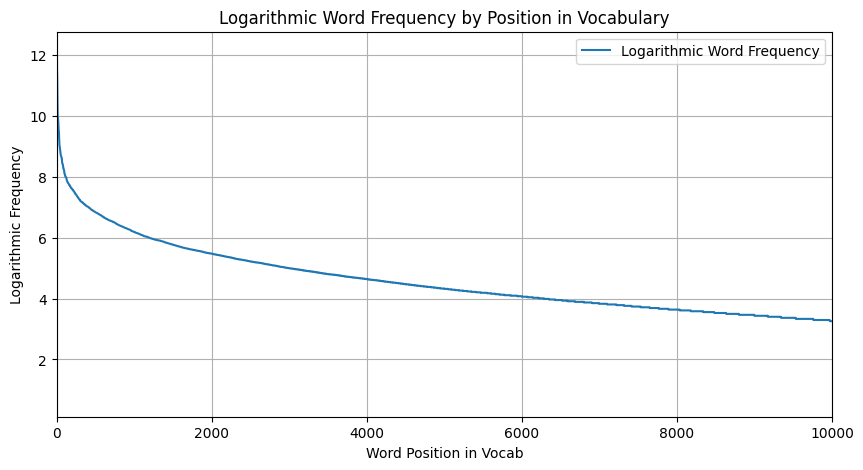

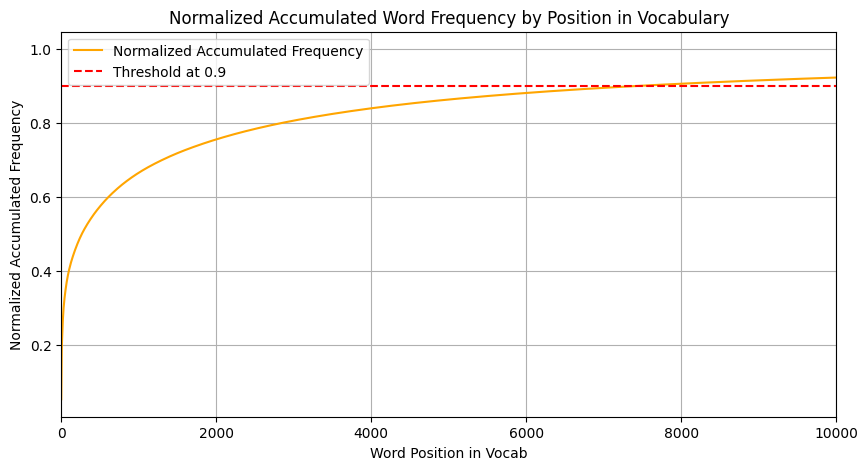

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get the frequencies in the same order
frequencies = [word_counts[word] for word in sorted_vocab_by_freq]

# Create the accumulated frequencies
accumulated_frequencies = np.cumsum(frequencies)

# Normalize the frequencies
max_frequency = max(frequencies)
normalized_frequencies = [freq / max_frequency for freq in frequencies]

# Normalize the accumulated frequencies
max_accumulated_frequency = max(accumulated_frequencies)
normalized_accumulated_frequencies = [accum / max_accumulated_frequency for accum in accumulated_frequencies]

# Logarithmic transformation of frequencies
log_frequencies = np.log1p(frequencies)  # Use np.log1p to avoid log(0)
log_accumulated_frequencies = np.log1p(accumulated_frequencies)

# Specify the range for the x-axis (e.g., the first 1000 words)
x_range = 10000

# Plotting the logarithmic word frequencies
plt.figure(figsize=(10, 5))
plt.plot(range(len(log_frequencies)), log_frequencies, label='Logarithmic Word Frequency')
plt.xlim(0, x_range)
plt.xlabel('Word Position in Vocab')
plt.ylabel('Logarithmic Frequency')
plt.title('Logarithmic Word Frequency by Position in Vocabulary')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the normalized accumulated frequencies
plt.figure(figsize=(10, 5))
plt.plot(range(len(normalized_accumulated_frequencies)), normalized_accumulated_frequencies, label='Normalized Accumulated Frequency', color='orange')
plt.xlim(0, x_range)
plt.axhline(y=0.9, color='r', linestyle='--', label='Threshold at 0.9')
plt.xlabel('Word Position in Vocab')
plt.ylabel('Normalized Accumulated Frequency')
plt.title('Normalized Accumulated Word Frequency by Position in Vocabulary')
plt.legend()
plt.grid(True)
plt.show()

En el primer gráfico, se observa que a partir de la palabra 2000 del vocabulario las palabras comienzan a ser menos frecuentes.

En el segundo gráfico podemos ver la frecuencia normalizada acumulada de las palabras del vocabulario. A partir de 7500 palabras se puede ver que se acumula el 90% de palabras de todo el texto, por lo que se decide usar este corte para mantener el vocabulario lo más pequeño posible mientras se trata de incluir la mayor cantidad de palabras.

In [14]:
# Guardar la lista en un archivo de texto
with open('vocab.txt', 'w') as f:
    for word in vocab:
        f.write(f"{word}\n")

print("Vocabulario guardado en 'vocab.txt'.")

# # Cargar la lista desde un archivo de texto
# with open('vocab2.txt', 'r') as f:
#     loaded_vocab = [line.strip() for line in f]

# print("Vocabulario cargado desde 'vocab.txt'.")
# print(f"Total de palabras únicas cargadas: {len(loaded_vocab)}")
# print("Palabras únicas cargadas (primeras 100):")
# print(loaded_vocab[:100])
# print(len(loaded_vocab))

# vocab = loaded_vocab


Vocabulario guardado en 'vocab.txt'.


##Preprocesamiento de datos

Vectorizacion del texto\
Previo al entrenamiento, necesitamos convertir el texto a una representacion numerica.

La capa `tf.keras.layers.StringLookup` nos permite convertir cada caracter en un ID numerico. Solo necesita que el texto este separado primero en tokens.

Dividir el Texto en Caracteres

In [ ]:
import tensorflow as tf

# Ejemplo de textos
example_texts = ['abcdefg', 'xyz']

# Dividir en caracteres
chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

Ahora creamos la capa `tf.keras.layers.StringLookup`:

In [ ]:
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

Esto nos convierte de tokens a IDs de caracteres:

In [ ]:
ids = ids_from_chars(chars)
ids

<tf.RaggedTensor [[2, 3734, 3423, 2637, 4920, 3034, 5211], [2325, 0, 0]]>

Usamos el método `get_vocabulary()` de la capa tf.keras.layers.StringLookup para que los tokens [UNK] se configuren de la misma manera.

In [ ]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

Esta capa recupera los caracteres desde los vectores de IDs y los retorna como un tf.RaggedTensor de caracteres:

In [ ]:
chars = chars_from_ids(ids)
chars

<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'[UNK]', b'[UNK]']]>

Finalmente usando `tf.strings.reduce_join` se pueden volver a juntar los caracteres en texto.

In [ ]:
tf.strings.reduce_join(chars, axis=-1).numpy()

array([b'abcdefg', b'x[UNK][UNK]'], dtype=object)

In [ ]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

Prediccion\
Dado un caracter, o una secuencia de caracteres, ¿cuál es el siguiente caracter más probable? Esta es la tarea para la que estamos entrenando al modelo. La entrada al modelo será una secuencia de caracteres y entrenamos el modelo para predecir la salida: el siguiente carácter en cada paso de tiempo.

Dado que los RNN mantienen un estado interno que depende de los elementos vistos anteriormente, a partir de todos los caracteres calculados hasta este momento, ¿cuál es el siguiente carácter?

Crear los ejemplos de entrenamiento\
Dividimos el texto en secuencias de ejemplo. Cada secuencia de entrada contendrá `seq_length` caracteres del texto.

Para cada secuencia de entrada, los targets correspondientes contienen la misma longitud de texto, excepto que se desplazan un carácter hacia la derecha.

Así que divida el texto en fragmentos de `seq_length+1`. Por ejemplo, digamos que `seq_length` es 3 y nuestro texto es "Hola". La secuencia de entrada sería "Hol" y la secuencia target "ola".

Para hacer esto, usamos la función `tf.data.Dataset.from_tensor_slices` para convertir el vector de texto en una secuencia de índices de caracteres.

In [ ]:
seq_length = 20

In [ ]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

Para nuestro caso, se deben tener ciertas consideraciones antes de crear el dataset. Primero, como separamos los articulos por clase, debemos realizar la segmentación de cada artículo por separado. Como mencionamos anteriormente, esto se hace para evitar el filtrado de datos entre noticias.

### Modelo caracter a caracter
Para procesar los datos para este modelo, simplemente lo hacemos de la misma manera que se hizo en el lab 10, utilizando el método unicode_split de Tensorflow. Luego buscamos las ids en el diccionario y creamos los segmentos

### Modelo palabra a palabra
Para este modelo nos vamos a tomar del análisis hecho sobre el vocabulario anteriormente. De la misma manera que antes, normalizamos el texto removiendo puntuaciones y llevando todo a minúscula. Debemos asegurarnos usar el mismo normalizado que lo que hicimos en el vocabulario. Con los resultados obtenidos, procedemos de la misma manera que en el modelo anterior

In [ ]:
import re

# # Caracter a caracter
# dataset_list = [] #tf.data.Dataset()
# for article_class in reduced_articles_by_class.keys():
#   #print(type(reduced_articles_by_class[article_class][0]))
#   for article in reduced_articles_by_class[article_class]:
#     ids = ids_from_chars(tf.strings.unicode_split(article, 'UTF-8'))
#     ids_dataset = tf.data.Dataset.from_tensor_slices(ids)
#     sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)
#     dataset = sequences.map(split_input_target)
#     dataset_list.append(dataset)

# Palabra a palabra
dataset_list = [] #tf.data.Dataset()
for article_class in reduced_articles_by_class.keys():
  #print(type(reduced_articles_by_class[article_class][0]))
  for article in reduced_articles_by_class[article_class]:
    # Convert to lowercase
    article = article.lower()
    # Remove special characters, keeping only alphanumeric characters and spaces
    article = re.sub(r'[^a-z0-9\s]', '', article)
    words = re.findall(r'\b\w+\b', article)

    ids = ids_from_chars(words)
    ids_dataset = tf.data.Dataset.from_tensor_slices(ids)
    sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)
    dataset = sequences.map(split_input_target)
    dataset_list.append(dataset)

Reducimos dimensionalidad para crear el dataset final.

In [ ]:
# Concatenate all datasets into one final dataset
final_dataset = tf.data.Dataset.from_tensor_slices(dataset_list)
final_dataset = final_dataset.flat_map(lambda x: x)

In [ ]:

# Batch size
BATCH_SIZE = 256

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 1000

final_dataset = (
    final_dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

final_dataset


<_PrefetchDataset element_spec=(TensorSpec(shape=(256, 20), dtype=tf.int64, name=None), TensorSpec(shape=(256, 20), dtype=tf.int64, name=None))>

El método batch nos permite convertir fácilmente estos caracteres individuales en secuencias del tamaño deseado.

Para el entrenamiento, necesitaremos un conjunto de datos de pares (input, label). Donde input y label son secuencias. En cada timestep, la entrada es el carácter actual y la etiqueta es el siguiente carácter.

Aquí hay una función que toma una secuencia como entrada, la duplica y la desplaza para alinear la entrada y la etiqueta para cada timestep:

In [ ]:
# for input_example, target_example in final_dataset.take(1):
#     print("Input example shape:", input_example.shape)
#     print("Target example shape:", target_example.shape)
#     print("Input example:", input_example)
#     print("Target example:", target_example)


In [ ]:
for input_example, target_example in final_dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())

Input : [b'questionwhatisthebestapproachtoprotectingmefromidtheftandrelatedactivitieswillasoftwarepackagework'
 b'theunitednationsonmondayadded14[UNK]andchemicalsincludinglead[UNK]forpetroltoagrowinglistof'
 b'foundtobe25percentto49percenteffectiveinpreventing[UNK]illnesswhichisasuspectedcaseofflu'
 b'[UNK][UNK]dirtyanddidntreadanyofthemorethan700birthday[UNK]senthimviaemailfromas'
 b'aftermorethantwoweeksofinvestigatingthe[UNK][UNK]exploitmicrosofthasyettoannouncewhenitwillbe'
 b'for[UNK]of[UNK]manypeopleare[UNK]upmsn39snewdesktopsearchprogramandtoolbarsuiteagainstgoogle'
 b'sunmicrosystemsandmicrosofthave[UNK]the[UNK][UNK]oftheir[UNK]pacttooctoberasthecompanies[UNK]additional'
 b'adesignflawinthe[UNK]systemofnasa39sgenesisspaceprobehasbeen[UNK]asthemostlikely'
 b'tokyothreeofjapanslargestelectronicscompanieshitachiltd[UNK]electricindustrialcoltdandtoshibacorpwillannouncelater'
 b'thebbcholdstalkswith[UNK]waltdisneyandtimewarnerbut[UNK]thatthetalksfocusedonthesale'
 b'searchenginegian

##Batches de entrenamiento
Usamos `tf.data` para dividir el texto en secuencias manejables. Pero antes de introducir estos datos en el modelo, es necesario mezclarlos y batchearlos.

##Construccion del modelo caracter a caracter y palabra a palabra
Ambos modelos admiten la misma arquitectura. Analizaremos las distintas opciones disponibles de redes recurrentes para construir el modelo. Todas tienen en común el uso de una primer neurona de embedding, una capa recurrente y una ultima capa densa cuyo tamaño es el del vocabulario.

### GRU
Por cada caracter el modelo calcula su embedding, corre la GRU un timestep con el embedding como entrada y aplica la capa densa para generar los logits prediciendo la probabilidades del siguiente caracter.

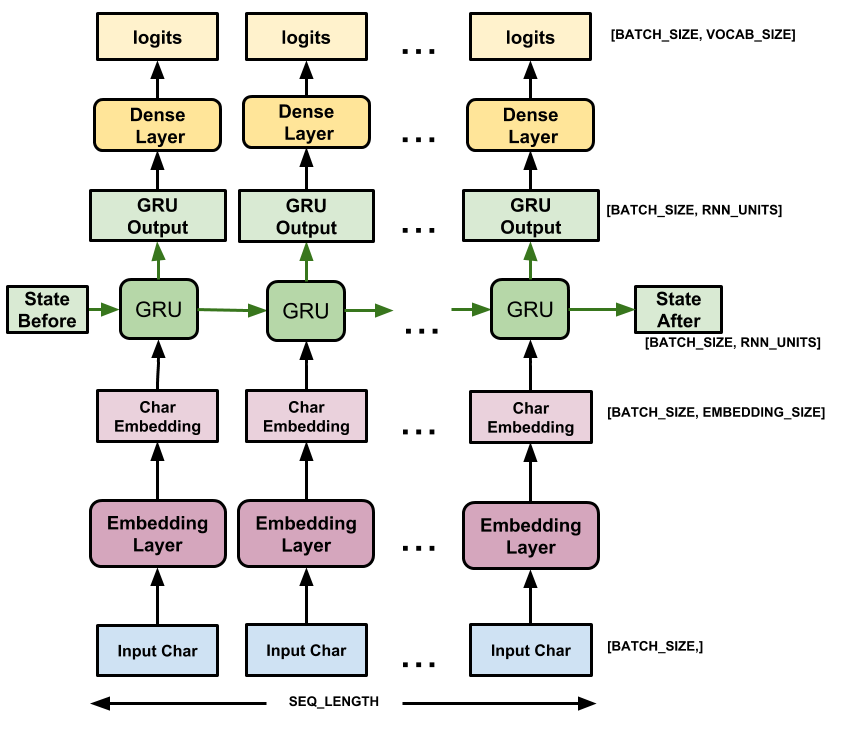

### LSTM
Funcionamiento similar a GRU. Posee un Forget Gate que decide cuanta información retener de timesteps anteriores, un Input y Output gate que deciden la memoria de corto y largo plazo para el proximo timestep.

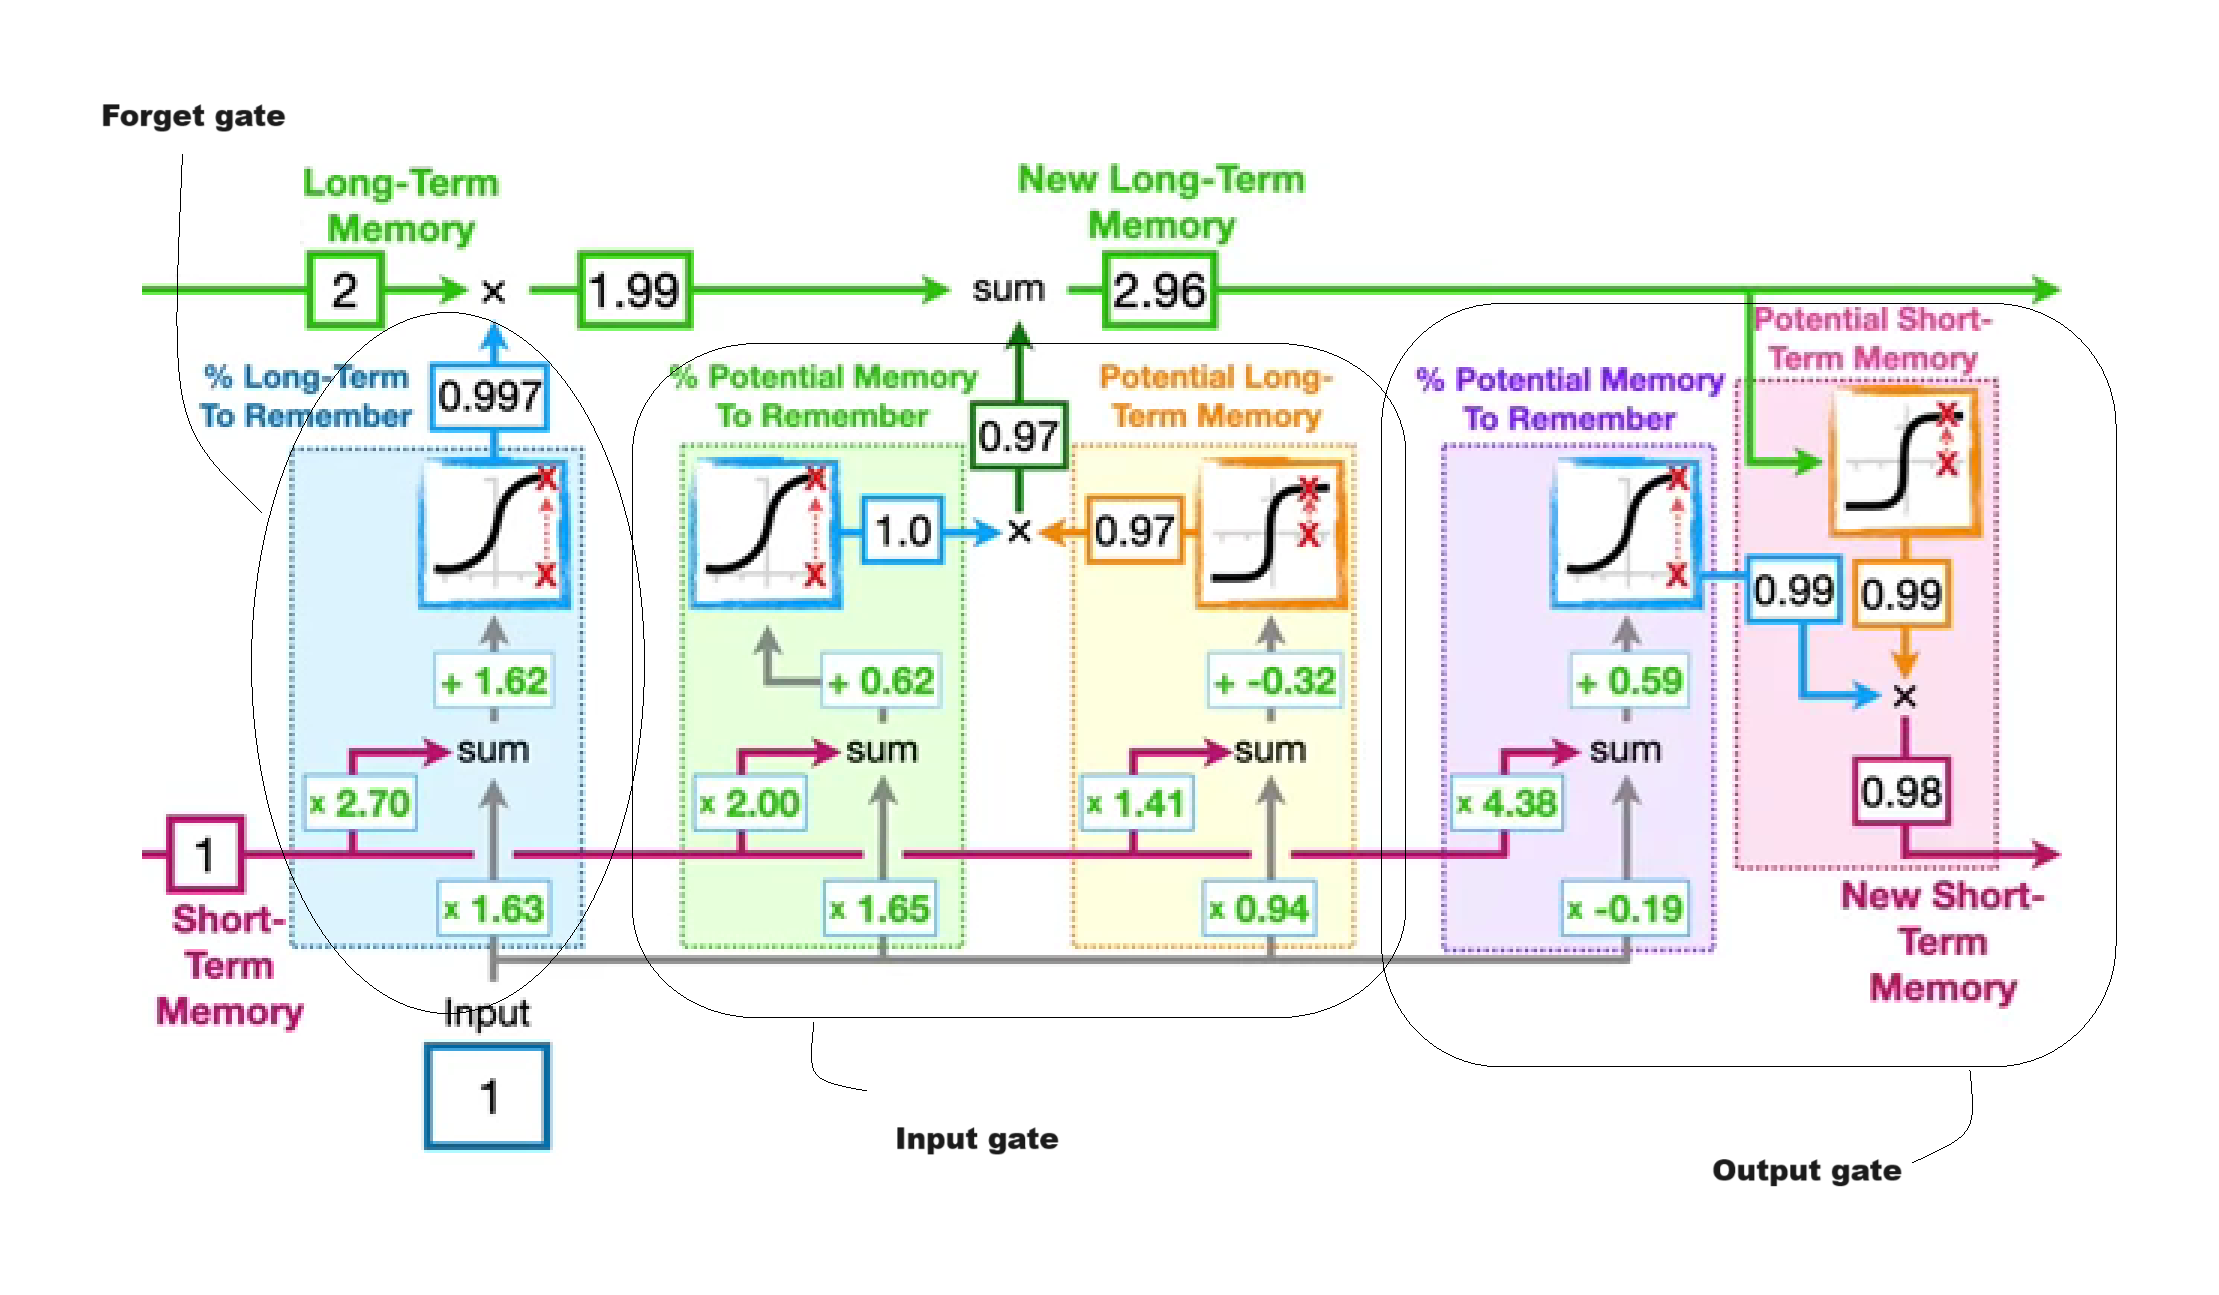

### Diferencias
Ambas arquitecturas sirven para nuestros modelos, sin embargo, debemos tener en cuenta que cada celda GRU cuenta con una menor cantidad de parametros que LSTM. A pesar de que mediante LSTM se pueda lograr un mejor desempeño, el uso de GRU puede llevar a entrenamientos mas rápidos (e incluso también tiempos de inferencia). Por lo tanto, como también tenemos recursos limitados, se opta por GRU, por lo que para ambos modelos usaremos como capas recurrentes a esta arquitectura, teniendo 1024 unidades en el modelo caracter a caracter y 512 en el modelo palabra a palabra

En esta sección definimos el modelo como una subclase de keras.Model.
Este modelo tiene tres capas:

`tf.keras.layers.Embedding:` La capa de entrada. Una lookup table entrenable que asignará cada ID de carácter a un vector con dimensiones embedding_dim;
`tf.keras.layers.GRU:` una capa recurrente GRU de tamaño units=rnn_units (también se puede usar una capa LSTM aquí).
`tf.keras.layers.Dense:` La capa de salida, con salidas vocab_size. Genera un logit para cada carácter del vocabulario. Estas son las probabilidades de cada caracter según el modelo.

In [ ]:
# # Para modelo a nivel de caracter
# # Length of the vocabulary in StringLookup Layer
# vocab_size = len(ids_from_chars.get_vocabulary())
# vocab_size
# # The embedding dimension
# embedding_dim = 256

# # Number of RNN units
# rnn_units = 1024

# Para modelo a nivel de palabra, probemos reduciendo la cantidad de rnn_units

# Length of the vocabulary in StringLookup Layer
vocab_size = len(ids_from_chars.get_vocabulary())
vocab_size
# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 512


In [ ]:
vocab_size

7501

In [ ]:
class MyModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, rnn_units):
        super(MyModel, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(rnn_units,
                                       return_sequences=True,
                                       return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs, states=None, return_state=False, training=False):
        x = self.embedding(inputs, training=training)
        if states is None:
            states = self.gru.get_initial_state(x)
        x, states = self.gru(x, initial_state=states, training=training)
        x = self.dense(x, training=training)

        if return_state:
            return x, states
        else:
            return x
    def load_model(self, filepath):
      return tf.keras.models.load_weights(filepath)

In [ ]:
model = MyModel(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

Por cada caracter el modelo calcula su embedding, corre la GRU un timestep con el embedding como entrada y aplica la capa densa para generar los logits prediciendo la probabilidades del siguiente caracter.

##Probar el modelo

Ejecutamos el modelo para ver que se comporta como se esperaba.

Primero verificamos la shape de salida:

In [ ]:
for input_example_batch, target_example_batch in final_dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")



(512, 20, 7501) # (batch_size, sequence_length, vocab_size)


In [ ]:
# for input in final_dataset.take(1):
#   print(input)

In [ ]:
# Llamar al método build() del modelo con las dimensiones de entrada
model.build(tf.TensorShape([None, None]))

# Ahora puedes llamar a model.summary()
model.summary()



Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     multiple                  1920256   
                                                                 
 gru_1 (GRU)                 multiple                  1182720   
                                                                 
 dense_1 (Dense)             multiple                  3848013   
                                                                 
Total params: 6950989 (26.52 MB)
Trainable params: 6950989 (26.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Para obtener predicciones reales del modelo, se deben tomar muestras de la distribución de salida para obtener índices de caracteres reales. Esta distribución está definida por los logits sobre el vocabulario de los caracteres.

Nota: Es importante tomar una muestra de esta distribución, ya que tomar el argmax de la distribución puede fácilmente hacer que el modelo se atasque en un bucle.

Tomando como ejemplo el primero del batch:

In [ ]:
example_batch_predictions = model(input_example_batch)

In [ ]:

sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

In [ ]:
sampled_indices

array([2726, 2655, 4167, 3431, 5650, 6959, 6135,  947, 1641, 4765, 1277,
       2828,   27, 1352,  833, 6928, 1682, 1292, 7215, 5468])

In [ ]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'aptigerwoodshasbeenchasingjack[UNK]ingolfrecordbookssincehewasakidwhenitcomes'

Next Char Predictions:
 b'answeraccusingmysteryimposedsubscriptionnearingunderlyingislandaddingsalvationtennisfoughtreutersborderrebelsdestroyingamdcallingtoutedthierry'


In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss)

In [ ]:
from tensorflow.keras.callbacks import Callback
import gc
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)
class GarbageCollectorCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        print(f"Garbage collection done after epoch {epoch}")

In [ ]:
!rm -rf /content/AA2_tp2/training_checkpoints

In [ ]:
EPOCHS = 80
history = model.fit(final_dataset, epochs=EPOCHS, callbacks=[checkpoint_callback, GarbageCollectorCallback()])

Epoch 1/80
     38/Unknown - 57s 1s/step - loss: 7.5862Garbage collection done after epoch 0
38/38 [==============================] - 58s 1s/step - loss: 7.5862
Epoch 2/80
38/38 [==============================] - 54s 1s/step - loss: 6.9469
Epoch 3/80
38/38 [==============================] - 53s 1s/step - loss: 6.8696
Epoch 4/80
38/38 [==============================] - 52s 1s/step - loss: 6.7507
Epoch 5/80
38/38 [==============================] - 51s 1s/step - loss: 6.6238
Epoch 6/80
38/38 [==============================] - 53s 1s/step - loss: 6.4719
Epoch 7/80
38/38 [==============================] - 52s 1s/step - loss: 6.3430
Epoch 8/80
38/38 [==============================] - 51s 1s/step - loss: 6.2268
Epoch 9/80
38/38 [==============================] - 52s 1s/step - loss: 6.1134
Epoch 10/80
38/38 [==============================] - 52s 1s/step - loss: 6.0076
Epoch 11/80
38/38 [==============================] - 51s 1s/step - loss: 5.9030
Epoch 12/80
38/38 [============================

In [ ]:
# Ensure to reset memory states and clear session
tf.keras.backend.clear_session()

In [ ]:
example_batch_predictions = model(input_example_batch)

sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()

print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())

Input:
 b'LondonWest[UNK]captain[UNK][UNK]wonthe[UNK]andputEnglandinto[UNK]in[UNK][UNK]conditionsin'

Next Char Predictions:
 b'[UNK]Prime[UNK]The[UNK]throughtheoffense[UNK][UNK]Butyardsa[UNK]match[UNK]againwithinthe'


In [ ]:
!gdown "1__3xKDe7Ddehhlp0M4WDa-KXZbp9b_yR"

Downloading...
From (original): https://drive.google.com/uc?id=1__3xKDe7Ddehhlp0M4WDa-KXZbp9b_yR
From (redirected): https://drive.google.com/uc?id=1__3xKDe7Ddehhlp0M4WDa-KXZbp9b_yR&confirm=t&uuid=d69a617b-04d4-4459-9bb9-8e6eb45eb669
To: /content/AA2_tp2/ckpt_19 (1).data-00000-of-00001
100% 163M/163M [00:05<00:00, 29.3MB/s]


In [ ]:
# model.save('gru-article-generation-20-epochs.keras')
model.load_weights('/content/AA2_tp2/ckpt_19 (1)')

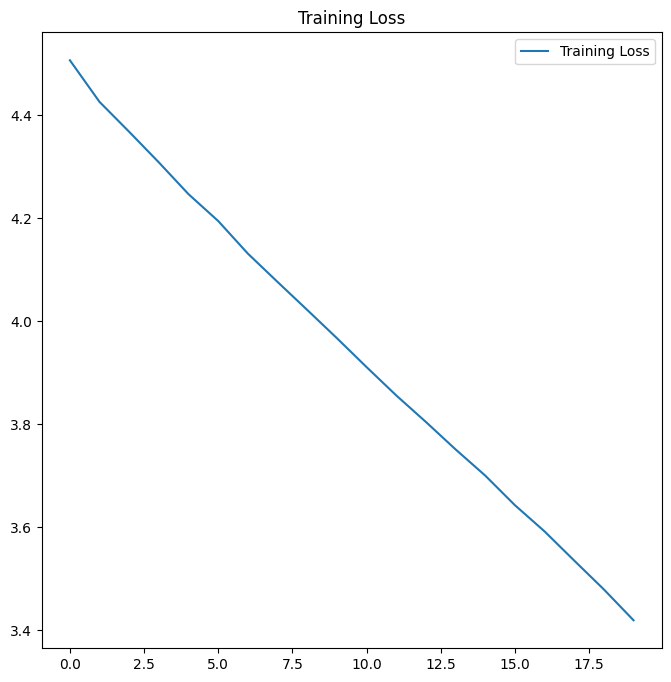

In [ ]:
import matplotlib.pyplot as plt
# Grafica la precisión y pérdida de entrenamiento y validación

loss = history.history['loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))

plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()